# 다중회귀 - 보스턴 주택 가격

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
from sklearn.datasets import load_boston
boston = load_boston()

In [25]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도와 선형회귀선

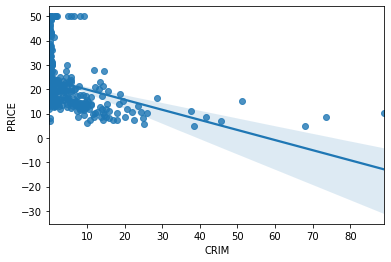

In [26]:
sns.regplot(x='CRIM', y='PRICE', data=df)
plt.show()

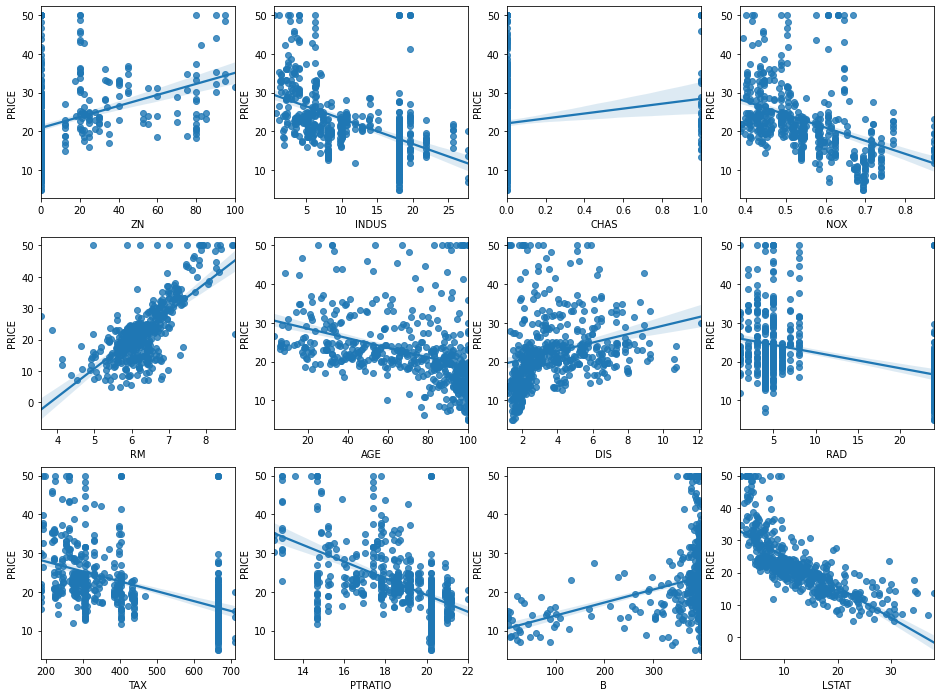

In [27]:
_, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

- feature별 R squared value


In [30]:
from sklearn.linear_model import LinearRegression


In [40]:
# CRIM
y = boston.target
X= df.CRIM.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.15078046904975717

In [41]:
y = boston.target
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(X, y)
    score = lr.score(X,y)
    print(f'{feature}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2021
)

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
# 다중선형회귀에서는 R squared value 의미
lr.score(X_test, y_test)

0.6948217410258382

In [47]:
# weight
lr.coef_

array([-1.10500227e-01,  5.26278094e-02,  9.51758224e-03,  3.13787206e+00,
       -1.80816721e+01,  3.76906339e+00,  9.62954788e-03, -1.47634409e+00,
        3.19031892e-01, -1.19276281e-02, -8.98574354e-01,  9.05059107e-03,
       -5.53828184e-01])

In [48]:
# bias
lr.intercept_

35.50366168175363

- 회귀식
<br>
PIRCE = -0.11 * CRIM + 0.053 +ZN + ..... - 0.55 * LSTAT + 35.5


- 테스트 데이터

In [50]:
X_test[0]

array([1.7446e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
       5.9600e+00, 9.2100e+01, 3.8771e+00, 4.0000e+00, 2.7700e+02,
       1.8600e+01, 3.9325e+02, 1.7270e+01])

In [51]:
# weight 와 bias로 구한 예측 값
np.dot(X_test[0], lr.coef_) + lr.intercept_

22.76089867361965

In [55]:
# predict로 예측한 값
lr.predict(X_test[:1])

array([22.76089867])

In [58]:
# 10개 데이터에 대한 예측값과 실제값
for i in range(10):
    pred1 = np.dot(X_test[i], lr.coef_) + lr.intercept_
    #pred2 = lr.predict(X_test[:1].reshape(-1,1))
    pred2 = lr.predict([X_test[i]])
    print(f'실제값:{y_test[i]}, 예측값1: {pred1:.2f}, 예측값2: {pred2[0]:.2f}')

실제값:21.7, 예측값1: 22.76, 예측값2: 22.76
실제값:15.6, 예측값1: 15.79, 예측값2: 15.79
실제값:20.0, 예측값1: 22.26, 예측값2: 22.26
실제값:12.8, 예측값1: 13.17, 예측값2: 13.17
실제값:50.0, 예측값1: 36.79, 예측값2: 36.79
실제값:20.6, 예측값1: 19.43, 예측값2: 19.43
실제값:22.6, 예측값1: 27.04, 예측값2: 27.04
실제값:24.1, 예측값1: 29.42, 예측값2: 29.42
실제값:24.4, 예측값1: 23.64, 예측값2: 23.64
실제값:36.1, 예측값1: 33.23, 예측값2: 33.23


In [59]:
a = np.arange(6).reshape(2,3)
np.dot(a, a.T)

array([[ 5, 14],
       [14, 50]])

In [61]:
b = np.arange(10)
np.dot(b,b.reshape(-1,1))

array([285])

In [62]:
lr.coef_.shape, X_test[0].shape

((13,), (13,))